In [2]:
# not work  but below ceel is work
from getpass import getpass
import os
user = 'abdulrahmangamal1999'
key = '23ce902c6ebe57b7936db11ec60dafb0'
if '.kaggle' not in os.listdir('/root'):
  !mkdir ~/.kaggle
  !touch /root/.kaggle/kaggle.json
  !chmod 666 /root/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
    !chmod 600 /root/.kaggle/kaggle.json


In [3]:
!kaggle competitions download -c dogs-vs-cats


 99% 808M/812M [00:07<00:00, 205MB/s]
100% 812M/812M [00:07<00:00, 119MB/s]


In [4]:
import zipfile

# Replace 'dataset.zip' with your actual downloaded file
with zipfile.ZipFile("dogs-vs-cats.zip", "r") as zip_ref:
    zip_ref.extractall("dataset-folder")


In [5]:
with zipfile.ZipFile("/content/dataset-folder/train.zip", "r") as zip_ref:
    zip_ref.extractall("dataset-folder")

# KNN

Instead of one `ref_cat_img`, can we use many?

If we have lots of cat imgs, we have more and more examples. We could compare to all to them, and say pick the top K relevant cat images. Those are likely to be of the same cat type.

1- But how to decide on _relevance_? How to decide two cat images are _simiar_? __We need simialrity metric__


2- On what basis we compare cat imgs? What values of the cat image we use for similarity?


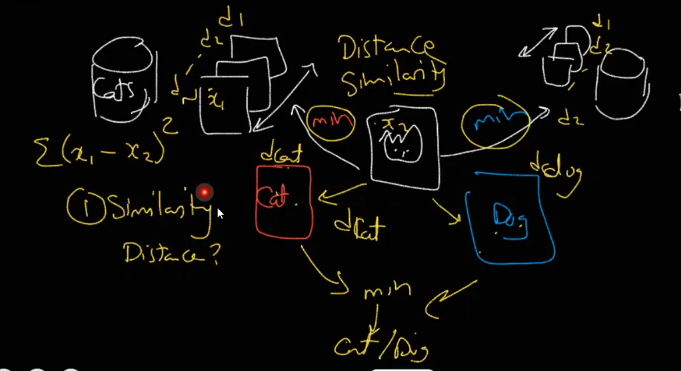

In [6]:
import pandas as pd ,numpy as np ,matplotlib.pyplot as plt

# read image by three away opencv , pil in kars , pil
####     show image by imshow in plt  

In [7]:
import cv2
img = cv2.imread('/content/dataset-folder/train/cat.0.jpg')


In [8]:
img.shape

(374, 500, 3)

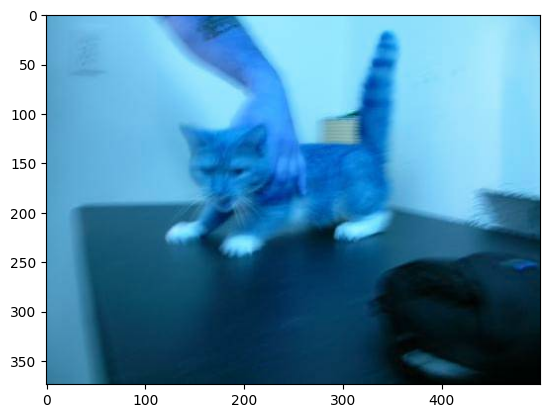

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img);

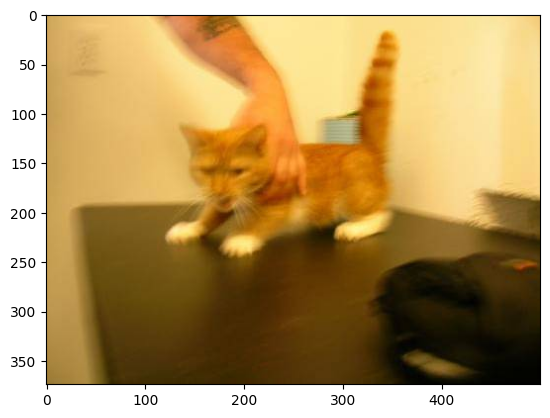

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

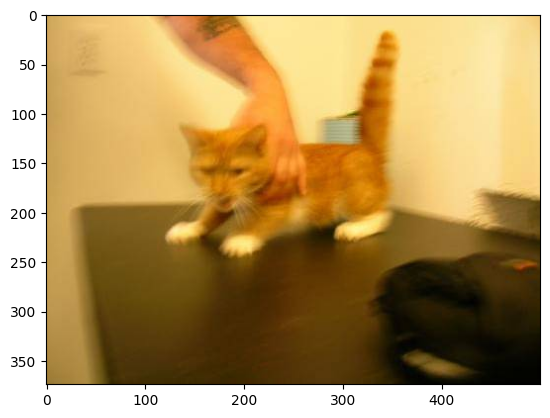

In [11]:
img_bgr = cv2.imread('/content/dataset-folder/train/cat.0.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

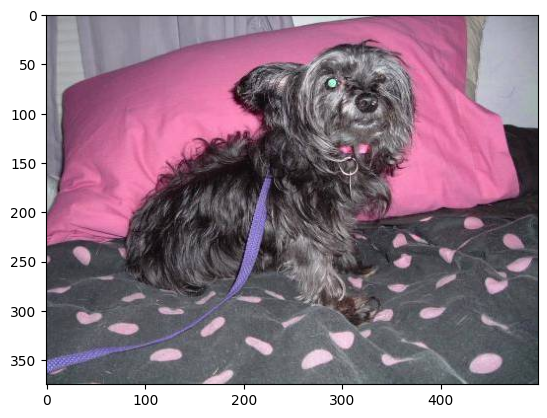

In [12]:
from keras.preprocessing import image
img = image.load_img('/content/dataset-folder/train/dog.0.jpg')
plt.imshow(img)

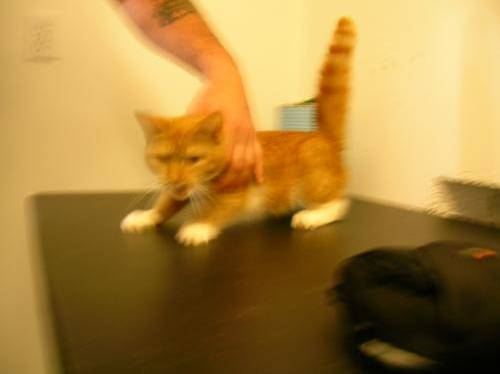

In [13]:
# Repeat with PIL
from PIL import Image
img = Image.open('/content/dataset-folder/train/cat.0.jpg')
img

In [14]:
img_tensor = np.array(img)

In [15]:
img_tensor.shape

(374, 500, 3)

In [16]:
folder_path='/content/dataset-folder/train/'

In [17]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw&s

/bin/bash: line 1: s: command not found
--2025-03-17 19:45:27--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.195.113, 74.125.195.139, 74.125.195.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6844 (6.7K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw’

images?q=tbn:ANd9Gc 100%[===================>]   6.68K  --.-KB/s    in 0s      

2025-03-17 19:45:27 (50.5 MB/s) - ‘images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw’ saved [6844/6844]



array([[[ 32,  48,   1],
        [ 32,  48,   1],
        [ 32,  48,   1],
        ...,
        [ 97,  50,   4],
        [100,  49,   2],
        [101,  50,   3]],

       [[ 32,  48,   1],
        [ 32,  48,   1],
        [ 32,  48,   1],
        ...,
        [ 94,  50,   3],
        [ 96,  49,   3],
        [ 98,  50,   2]],

       [[ 31,  47,   2],
        [ 31,  47,   2],
        [ 31,  47,   2],
        ...,
        [ 90,  50,   1],
        [ 91,  49,   1],
        [ 93,  49,   2]],

       ...,

       [[230, 219, 213],
        [234, 223, 217],
        [238, 227, 221],
        ...,
        [141, 154, 147],
        [141, 154, 147],
        [141, 154, 147]],

       [[228, 217, 211],
        [235, 224, 218],
        [242, 231, 225],
        ...,
        [195, 207, 203],
        [189, 201, 197],
        [181, 193, 189]],

       [[219, 208, 202],
        [224, 213, 207],
        [229, 218, 212],
        ...,
        [192, 204, 200],
        [191, 203, 199],
        [191, 203, 199]]], dtype=uint8)
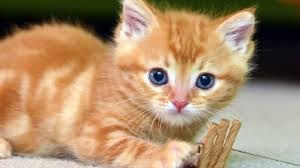

In [36]:
img_need_to_classify= Image.open('images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw')
img_need_to_classify=np.array(img_need_to_classify)
img_need_to_classify

(374, 500, 3)


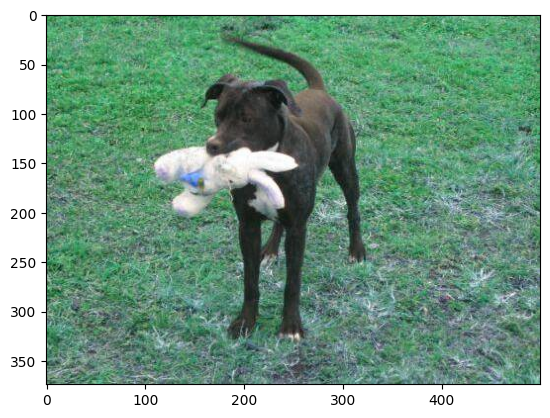

In [21]:
# twst loop on all image
for filename in os.listdir(folder_path):
    if filename.endswith((".jpg", ".png", ".jpeg")):  # Filter image files
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img_tensor = np.array(img)
        print(img_tensor.shape)
        plt.imshow(img)
        break



In [41]:
#loop on cat
cat_diff_list=[]
for filename in os.listdir(folder_path):
    if filename.endswith((".jpg", ".png", ".jpeg")) and filename.startswith(('cat')):  # Filter image files
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img_tensor = np.array(img)
        img_tensor_reshape=cv2.resize(img_tensor,(img_need_to_classify.shape[1],img_need_to_classify.shape[0]))
        img_diff=(img_tensor_reshape-img_need_to_classify)**2
        cat_diff_list.append(img_diff.sum())




In [42]:
#loop on dog
dog_diff_list=[]
for filename in os.listdir(folder_path):
    if filename.endswith((".jpg", ".png", ".jpeg")) and filename.startswith(('dog')):  # Filter image files
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img_tensor = np.array(img)
        img_tensor_reshape=cv2.resize(img_tensor,(img_need_to_classify.shape[1],img_need_to_classify.shape[0]))
        img_diff=(img_tensor_reshape-img_need_to_classify)**2
        dog_diff_list.append(img_diff.sum())




In [43]:
np.sort(dog_diff_list)

array([14940549, 14987508, 15000974, ..., 16507176, 16520756, 16584588],
      dtype=uint64)

In [44]:
np.sort(cat_diff_list)

array([14905244, 14991464, 15076974, ..., 16559947, 16571765, 16639372],
      dtype=uint64)